### Participants:
- Carlos Paredes
- Stefano Sossi
- Vincent Valenzuela

In [1]:
import numpy as np
import pandas as pd
import os,math
import matplotlib.pyplot as plt
import re
from dateutil.relativedelta import relativedelta 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

**Data**. 
Frist read the data and prepare it for the proyect.

In [2]:
#The data
corpus_root = 'data/coins/'

coins = list()
coins_names = list()
for coin_file in os.listdir(corpus_root):
   print(coin_file)
   coins_names.append(coin_file.split('.')[0])
   coins.append(pd.read_csv(os.path.join(corpus_root,coin_file)))


Aave.csv
algorand.csv
Ankr.csv
Arweave.csv
avalanche.csv
Axie Infinity.csv
Basic Attention Token.csv
binance coin.csv
bitcoin cash.csv
Bitcoin SV.csv
bitcoin.csv
cardano.csv
Celo.csv
chainlink.csv
Chiliz.csv
Compound.csv
cosmos.csv
crypto.com coin.csv
Curve DAO Token.csv
dai.csv
Dash.csv
decentraland.csv
Decred.csv
dogecoin.csv
elrond.csv
Enjin Coin.csv
EOS.csv
ethereum classic.csv
ethereum.csv
fantom.csv
filecoin.csv
ftx token.csv
Hedera.csv
Horizen.csv
ICON.csv
IOTA.csv
IoTeX.csv
Kadena.csv
Kusama.csv
litecoin.csv
Loopring.csv
Maker.csv
Monero.csv
near protocol.csv
NEM.csv
Neo.csv
OMG Network.csv
PancakeSwap.csv
polkadot.csv
polygon.csv
Qtum.csv
Quant.csv
SHIBA INU.csv
Siacoin.csv
solana.csv
stellar.csv
terra.csv
tether.csv
tezos.csv
the graph.csv
The Sandbox.csv
Theta Fuel.csv
theta.csv
THORChain.csv
tron.csv
TrueUSD.csv
uniswap.csv
usd coin.csv
vechain.csv
Voyager Token.csv
Waves.csv
WAX.csv
wrapped bitcoin.csv
xrp.csv
Zcash.csv


In [3]:
leaderboard = pd.read_csv('data/leaderboard/Current Crypto leaderboard.csv')
leaderboard = leaderboard.head(10)
leaderboard

,Rank,Name,Symbol,Price (USD),Market Cap,Vol (24H),Total Vol,Chg (24H),Chg (7D),Dataset Availability
0,1,Bitcoin,BTC,58543.000000,$1.12T,$37.89B,29.37%,2.47%,3.16%,True
1,2,Ethereum,ETH,4682.280000,$559.27B,$26.12B,20.24%,8.01%,9.91%,True
2,3,Binance Coin,BNB,628.820000,$105.79B,$2.65B,2.05%,1.62%,6.52%,True
3,4,Tether,USDT,1.000900,$73.27B,$85.51B,66.27%,0.01%,-0.05%,True
4,5,Solana,SOL,215.530000,$66.17B,$2.59B,2.00%,4.18%,0.34%,True
5,6,Cardano,ADA,1.609100,$54.01B,$1.98B,1.54%,2.57%,-9.35%,True
6,7,XRP,XRP,1.022450,$48.58B,$3.13B,2.43%,4.73%,-2.13%,True
7,8,USD Coin,USDC,0.999300,$38.64B,$5.04B,3.90%,-0.02%,-0.13%,True
8,9,Polkadot,DOT,38.412000,$38.32B,$1.46B,1.13%,6.82%,-4.31%,True
9,10,Dogecoin,DOGE,0.221496,$29.57B,$2.00B,1.55%,2.96%,-2.93%,True


In [4]:
coins[0].head(100)

,Date,Open,High,Low,Close,Volume,Currency
0,2020-10-05,0.528101,0.528101,0.528101,0.528101,879.0,USD
1,2020-10-06,0.528101,0.528101,0.528101,0.528101,879.0,USD
2,2020-10-07,0.528101,0.528101,0.528101,0.528101,879.0,USD
3,2020-10-08,0.528101,0.528101,0.528101,0.528101,879.0,USD
4,2020-10-10,46.818146,51.405655,46.703327,49.133717,1074627.0,USD
...,...,...,...,...,...,...,...
95,2021-06-15,319.400604,326.900909,308.366943,319.757294,352145487.0,USD
96,2021-06-16,311.928223,313.738556,287.531158,290.268494,192278220.0,USD
97,2021-06-17,290.296387,305.388519,285.459717,292.914612,146151226.0,USD
98,2021-06-18,293.533905,293.784607,253.611221,264.352081,229941835.0,USD


In [5]:
print(coins_names)

['Aave', 'algorand', 'Ankr', 'Arweave', 'avalanche', 'Axie Infinity', 'Basic Attention Token', 'binance coin', 'bitcoin cash', 'Bitcoin SV', 'bitcoin', 'cardano', 'Celo', 'chainlink', 'Chiliz', 'Compound', 'cosmos', 'crypto', 'Curve DAO Token', 'dai', 'Dash', 'decentraland', 'Decred', 'dogecoin', 'elrond', 'Enjin Coin', 'EOS', 'ethereum classic', 'ethereum', 'fantom', 'filecoin', 'ftx token', 'Hedera', 'Horizen', 'ICON', 'IOTA', 'IoTeX', 'Kadena', 'Kusama', 'litecoin', 'Loopring', 'Maker', 'Monero', 'near protocol', 'NEM', 'Neo', 'OMG Network', 'PancakeSwap', 'polkadot', 'polygon', 'Qtum', 'Quant', 'SHIBA INU', 'Siacoin', 'solana', 'stellar', 'terra', 'tether', 'tezos', 'the graph', 'The Sandbox', 'Theta Fuel', 'theta', 'THORChain', 'tron', 'TrueUSD', 'uniswap', 'usd coin', 'vechain', 'Voyager Token', 'Waves', 'WAX', 'wrapped bitcoin', 'xrp', 'Zcash']


We add a name column to each data frame to identify the coin we are working with

In [6]:
for index,element in enumerate(coins, start=0):
    element['Name'] = coins_names[index]
coins[1].head(100)

,Date,Open,High,Low,Close,Volume,Currency,Name
0,2019-07-25,0.5983,0.6148,0.5860,0.6102,4753925,USD,algorand
1,2019-07-26,0.6103,0.7111,0.5940,0.6503,8947342,USD,algorand
2,2019-07-27,0.6501,0.6673,0.5728,0.5788,9094853,USD,algorand
3,2019-07-28,0.5788,0.5992,0.5584,0.5759,11048324,USD,algorand
4,2019-07-29,0.5770,0.5934,0.5546,0.5710,11034328,USD,algorand
...,...,...,...,...,...,...,...,...
95,2019-10-28,0.2177,0.2397,0.2177,0.2303,2272452,USD,algorand
96,2019-10-29,0.2304,0.2347,0.2218,0.2263,1629597,USD,algorand
97,2019-10-30,0.2263,0.2266,0.2074,0.2109,1533512,USD,algorand
98,2019-10-31,0.2110,0.2230,0.2076,0.2224,1547526,USD,algorand


Get top 10 coins according to leaderboard.csv

In [7]:

top_10 = list()
index_list = list()
for index,element in enumerate(coins_names, start=0):
    if leaderboard['Name'].str.contains(element,flags=re.IGNORECASE).any():
        i = leaderboard[leaderboard['Name'].apply(lambda x: x.upper() == element.upper())]
        top_10.append(coins[index])
        index_list.append(int(i['Rank']))


top_10 = [x for _, x in sorted(zip(index_list, top_10))]

top_10[1]


,Date,Open,High,Low,Close,Volume,Currency,Name
0,2016-03-10,11.20,11.85,11.07,11.75,4,USD,ethereum
1,2016-03-11,11.75,11.95,11.75,11.95,179,USD,ethereum
2,2016-03-12,11.95,13.45,11.95,12.92,833,USD,ethereum
3,2016-03-13,12.92,15.07,12.92,15.07,1295,USD,ethereum
4,2016-03-14,15.07,15.07,11.40,12.50,92183,USD,ethereum
...,...,...,...,...,...,...,...,...
2087,2021-11-26,4520.30,4548.10,3917.43,4034.53,1004251,USD,ethereum
2088,2021-11-27,4037.06,4183.02,4029.06,4094.80,370731,USD,ethereum
2089,2021-11-28,4095.16,4297.63,3980.24,4296.98,487532,USD,ethereum
2090,2021-11-29,4296.98,4456.82,4280.18,4443.22,532658,USD,ethereum


Verifying in the list of `DataFrames` that there is no `missing data`.

In [57]:
nullValues = []
for coin in coins:
    nullValues.append(coin.isnull().sum().sum())
if np.sum(nullValues)==0:
    print('There is no missing data for all the DataFrames')
else:
    print('There is missing data in DataFrames')

There is no missing data for all the DataFrames


Using Pandas `to_datetime` method to parse the `Column Date` into a `datetime` object.

In [8]:
filtered_top10 = list()
semester = relativedelta(months=6)
for index,element in enumerate(top_10, start=0):
    element['Date'] = pd.to_datetime(element['Date'])
    filtered_df = element.loc[(element['Date'] >= element['Date'].max()-semester)
                     & (element['Date'] < element['Date'].max())]
    filtered_top10.append(filtered_df)
    
filter0 = filtered_top10[6][filtered_top10[6]['Volume'] == 0] 
filter0




,Date,Open,High,Low,Close,Volume,Currency,Name


Reviewing the type for each column of the DataFrame and verified that date was converted to `datetime` object

In [13]:
filtered_top10[0].dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Currency            object
Name                object
dtype: object

In [63]:
print("Total records for the topten coins:\n")
[print(coin.iloc[0].Name,": ",coin.shape) for coin in filtered_top10] 

Total records for the topten coins:

bitcoin :  (184, 8)
ethereum :  (184, 8)
binance coin :  (184, 8)
tether :  (184, 8)
solana :  (181, 8)
cardano :  (184, 8)
xrp :  (184, 8)
usd coin :  (184, 8)
polkadot :  (184, 8)
dogecoin :  (184, 8)


[None, None, None, None, None, None, None, None, None, None]

In [14]:
leaderboardnames = leaderboard['Name']
leaderboardnames

0         Bitcoin
1        Ethereum
2    Binance Coin
3          Tether
4          Solana
5         Cardano
6             XRP
7        USD Coin
8        Polkadot
9        Dogecoin
Name: Name, dtype: object

#### Saving the topten dataframes in a csv file
---
1. Created a new directory in data called topten-coins for saving the csv files.
2. For each DataFrame of the list filtered_topten save in a csv file

In [23]:
# Creating the directory for saving the topten coins files
dirName='./data/topten-coins'
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:
    print("Directory " , dirName ,  " Already Exists ")

Directory  ./data/topten-coins  Already Exists 


In [54]:
# Iterating in the list of the topten coins
for coin in filtered_top10:
    fileName = dirName+'/'+coin.iloc[0].Name+'.csv'
    if not os.path.exists(fileName):
        # Creating a csv file for every data frame of the list
        coin.to_csv(fileName,index=False)
        print("File ",fileName," Created")
    else:
        print("File ",fileName," Already Exists")

File  ./data/topten-coins/bitcoin.csv  Created
File  ./data/topten-coins/ethereum.csv  Created
File  ./data/topten-coins/binance coin.csv  Created
File  ./data/topten-coins/tether.csv  Created
File  ./data/topten-coins/solana.csv  Created
File  ./data/topten-coins/cardano.csv  Created
File  ./data/topten-coins/xrp.csv  Created
File  ./data/topten-coins/usd coin.csv  Created
File  ./data/topten-coins/polkadot.csv  Created
File  ./data/topten-coins/dogecoin.csv  Created


Relacion del volumen de las top 10 criptomonedas en los ultimos 6 meses.

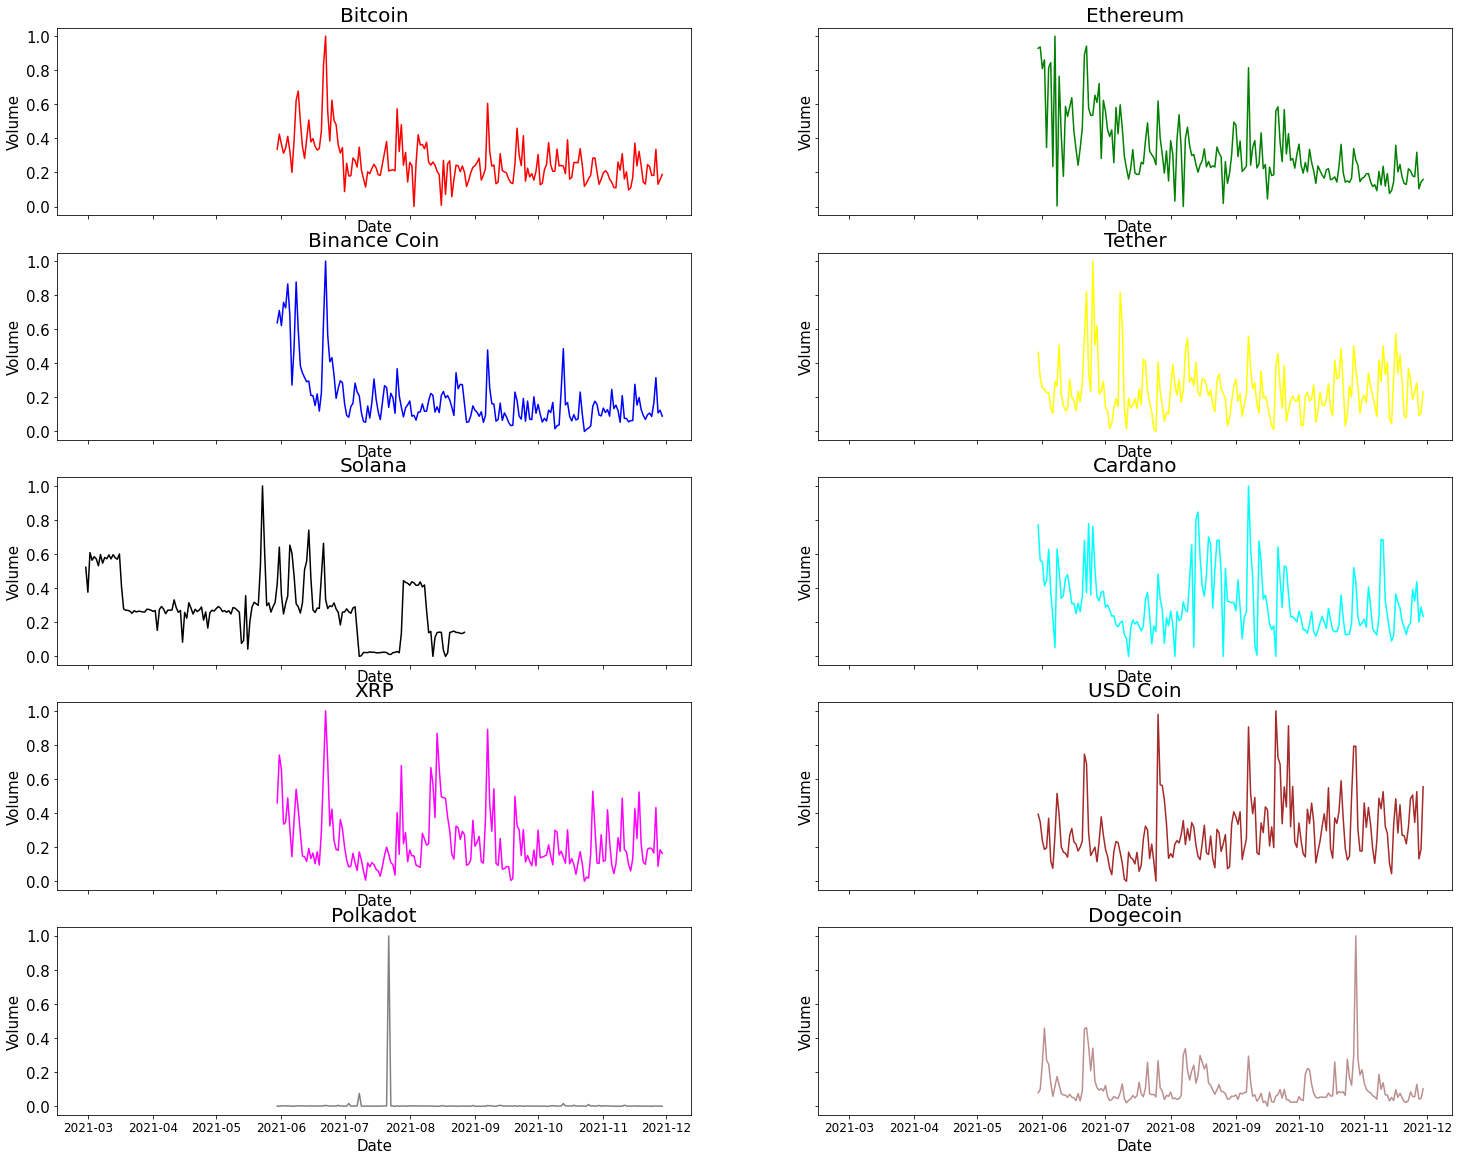

In [11]:
colors=['red','green','blue','yellow','black','cyan','magenta','brown','gray','rosybrown'
        ,'salmon','peachpuff','orange','gold','olive','lime','steelblue','pink','indigo']
COLUMNS = 2
ROWS = math.ceil(10/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(25, 20), sharey=True, sharex=True)
std_scaler = StandardScaler()

for index,element in enumerate(filtered_top10, start=0):
    
    current_column = index%COLUMNS
    current_row = index//COLUMNS
    
    ax = axs[current_row, current_column]
    ax.plot(element['Date'], (element['Volume'] - element['Volume'].min()) / (element['Volume'].max() - element['Volume'].min()),color=colors[index])
    ax.set_ylabel('Volume', size=15)
    ax.set_xlabel('Date', size=15)
    ax.set_title(leaderboardnames[index], fontsize=20)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=15)


